# What are the most demanded skills for the top 3 most popular data roles?

# Libraries

In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

# Loading Dataset

In [2]:
df = pd.read_csv("data_jobs.csv")

## Cleanup

In [3]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

---

## Filtering To Egypt

In [4]:
df_EG = df[df["job_country"] == "Egypt"]
df_EG

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
83,Software Engineer,Senior DevOps Engineer,Egypt (+1 other),via Levels.fyi,Full-time,False,Egypt,2023-11-01 13:13:36,False,False,Egypt,NaN,NaN,NaN,2U,"[bash, python, aws, linux, splunk, github, jen...","{'analyst_tools': ['splunk'], 'cloud': ['aws']..."
1320,Software Engineer,Integration Engineer,"Cairo, Egypt",via Trabajo.org,Full-time,False,Egypt,2023-07-21 13:43:21,False,False,Egypt,NaN,NaN,NaN,Ericsson,"[go, node]","{'programming': ['go'], 'webframeworks': ['nod..."
1362,Machine Learning Engineer,Machine learning engineer,Egypt,via Indeed,Full-time,False,Egypt,2023-02-28 13:39:47,False,False,Egypt,NaN,NaN,NaN,IQVIA,NaN,NaN
1567,Data Analyst,Data Analyst,Egypt,via Egypt.tanqeeb.com,Full-time,False,Egypt,2023-11-05 13:53:44,True,False,Egypt,NaN,NaN,NaN,Al Asdekaa Group for Dai,[python],{'programming': ['python']}
2981,Senior Data Analyst,Senior Data Business Analyst,Egypt,via LinkedIn,Full-time,False,Egypt,2023-12-17 13:18:00,False,False,Egypt,NaN,NaN,NaN,FlairsTech,"[sql, python, r, tableau, excel]","{'analyst_tools': ['tableau', 'excel'], 'progr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785550,Data Engineer,Data Engineer,Egypt,via Trabajo.org,Full-time,False,Egypt,2023-12-07 06:20:28,True,False,Egypt,NaN,NaN,NaN,On-Hire,NaN,NaN
785554,Senior Data Engineer,Senior Database Engineer,Egypt,via Trabajo.org,Full-time,False,Egypt,2023-12-07 06:20:28,False,False,Egypt,NaN,NaN,NaN,MigrationIT,"[sql, sql server, postgresql, mysql, oracle]","{'cloud': ['oracle'], 'databases': ['sql serve..."
785558,Business Analyst,Marketing Analyst,"Cairo, Egypt",via Trabajo.org,Full-time,False,Egypt,2023-12-07 06:20:18,False,False,Egypt,NaN,NaN,NaN,Informa Markets,"[outlook, sheets, excel, power bi, tableau, lo...","{'analyst_tools': ['outlook', 'sheets', 'excel..."
785587,Business Analyst,Business Intelligence Analyst,Egypt,via Trabajo.org,Full-time,False,Egypt,2023-12-07 06:20:16,False,False,Egypt,NaN,NaN,NaN,Ingram Micro,"[python, power bi, dax]","{'analyst_tools': ['power bi', 'dax'], 'progra..."


## Skills In Each Job Role

In [5]:
df_Skills = df_EG.explode("job_skills")
df_Skills[["job_title", "job_skills"]]

,job_title,job_skills
83,Senior DevOps Engineer,bash
83,Senior DevOps Engineer,python
83,Senior DevOps Engineer,aws
83,Senior DevOps Engineer,linux
83,Senior DevOps Engineer,splunk
...,...,...
785558,Marketing Analyst,looker
785587,Business Intelligence Analyst,python
785587,Business Intelligence Analyst,power bi
785587,Business Intelligence Analyst,dax


In [6]:
df_skills_count = df_Skills.groupby(["job_skills", "job_title_short"]).size()
df_skills_count = df_skills_count.reset_index(name="skill_count")
df_skills_count.sort_values(by="skill_count", ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
586,python,Data Engineer,270
753,sql,Data Engineer,251
587,python,Data Scientist,239
752,sql,Data Analyst,199
754,sql,Data Scientist,185
...,...,...,...
4,airflow,Machine Learning Engineer,1
896,yarn,Software Engineer,1
897,zoom,Business Analyst,1
898,zoom,Data Engineer,1


## Top 3 most popular data roles

In [7]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

## Top 5 skills for each job role

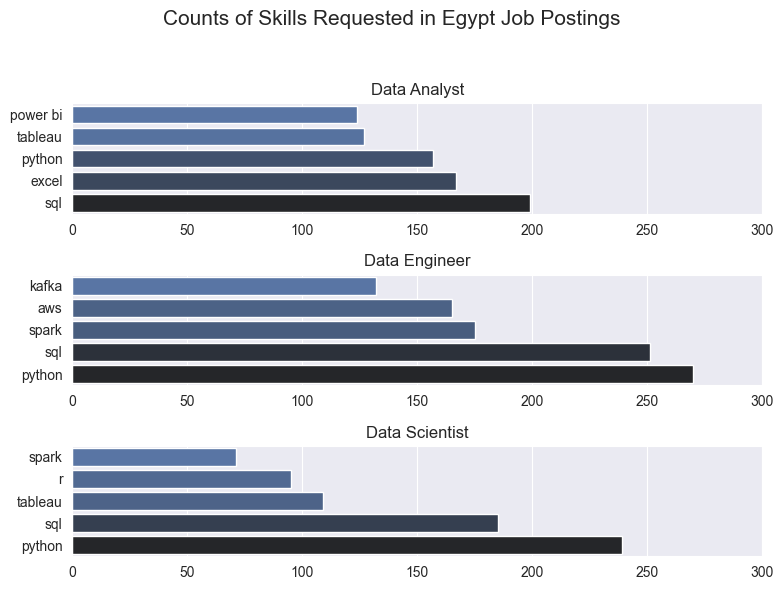

In [8]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(8, 6))  # Bigger figure size

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].nlargest(5, 'skill_count')
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')

    ax[i].set_title(job_title, fontsize=12)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 300)

fig.suptitle('Counts of Skills Requested in Egypt Job Postings', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95], h_pad=1)  # Space for title & subplots
plt.show()


In [9]:
df_job_title_count = df_EG["job_title_short"].value_counts().reset_index(name="jobs_total")
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,529
1,Data Scientist,512
2,Data Engineer,494
3,Business Analyst,325
4,Software Engineer,286
5,Senior Data Engineer,263
6,Senior Data Scientist,166
7,Senior Data Analyst,143
8,Machine Learning Engineer,107
9,Cloud Engineer,107


In [10]:
df_skills_count

,job_skills,job_title_short,skill_count
586,python,Data Engineer,270
753,sql,Data Engineer,251
587,python,Data Scientist,239
752,sql,Data Analyst,199
754,sql,Data Scientist,185
...,...,...,...
4,airflow,Machine Learning Engineer,1
896,yarn,Software Engineer,1
897,zoom,Business Analyst,1
898,zoom,Data Engineer,1


## Merging the two DataFrames (df_skills_count and df_job_title_count)

In [11]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on="job_title_short", how="left")
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Engineer,270,494
1,sql,Data Engineer,251,494
2,python,Data Scientist,239,512
3,sql,Data Analyst,199,529
4,sql,Data Scientist,185,512
...,...,...,...,...
895,airflow,Machine Learning Engineer,1,107
896,yarn,Software Engineer,1,286
897,zoom,Business Analyst,1,325
898,zoom,Data Engineer,1,494


## Counting the percentage of each skill

In [12]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Engineer,270,494,54.655870
1,sql,Data Engineer,251,494,50.809717
2,python,Data Scientist,239,512,46.679688
3,sql,Data Analyst,199,529,37.618147
4,sql,Data Scientist,185,512,36.132812
...,...,...,...,...,...
895,airflow,Machine Learning Engineer,1,107,0.934579
896,yarn,Software Engineer,1,286,0.349650
897,zoom,Business Analyst,1,325,0.307692
898,zoom,Data Engineer,1,494,0.202429


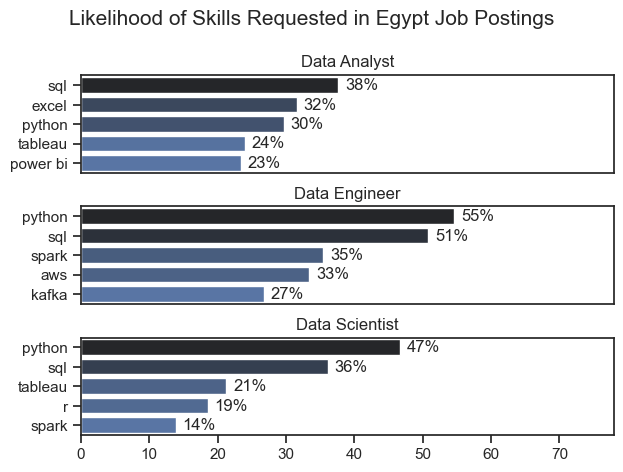

In [13]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in Egypt Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()